# Importing Data

In [1]:
# Install using "pip install surprise"
from surprise import SVD, Dataset, accuracy, BaselineOnly, NMF, SVDpp
from surprise.reader import Reader
from surprise.model_selection import cross_validate, GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold

In [2]:
# Reader that reads tab-separated data
reader = Reader(sep='\t')
full = Dataset.load_from_file("./data/data.txt", reader=reader)
train = Dataset.load_from_file("./data/train.txt", reader=reader)
test = Dataset.load_from_file("./data/test.txt", reader=reader)

# Training Models, Cross Validation, Test Error

In [30]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0,0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3,0.5]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=100, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

0
RMSE: 0.5721
RMSE: 1.0444
0.001
RMSE: 0.5687
RMSE: 1.0382
0.003
RMSE: 0.5700
RMSE: 1.0176
0.01
RMSE: 0.5793
RMSE: 1.0098
0.03
RMSE: 0.6068
RMSE: 0.9623
0.05
RMSE: 0.6403
RMSE: 0.9310
0.1
RMSE: 0.7520
RMSE: 0.9089
0.2
RMSE: 0.9044
RMSE: 0.9463
0.3
RMSE: 0.9624
RMSE: 0.9889
0.5
RMSE: 1.0506
RMSE: 1.0713


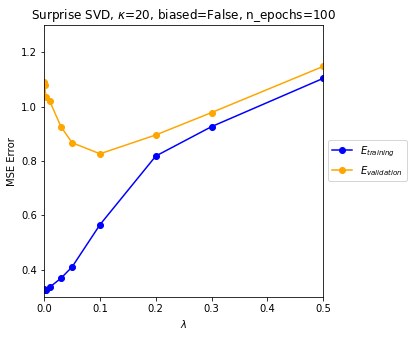

In [33]:
TrnEr = np.array(train_err)**2
TstEr = np.array(test_err)**2
plt.figure(figsize=(5,5))
plt.plot(reg, TrnEr, 'o-', label="$E_{training}$",color='blue')
plt.plot(reg, TstEr, 'o-', label="$E_{validation}$",color='orange')
plt.title("Surprise SVD, $\kappa$=20, biased=False, n_epochs=100")
plt.xlabel("$\lambda$")
plt.ylabel("MSE Error")
plt.ylim([0.3,1.3])
plt.xlim([0,0.5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('SVDNoBias_RegErr.png',bbox_inches='tight')
plt.show()

0
RMSE: 0.8044
RMSE: 0.9404
0.001
RMSE: 0.8027
RMSE: 0.9362
0.003
RMSE: 0.8099
RMSE: 0.9382
0.01
RMSE: 0.8177
RMSE: 0.9328
0.03
RMSE: 0.8482
RMSE: 0.9357
0.05
RMSE: 0.8674
RMSE: 0.9349
0.1
RMSE: 0.9028
RMSE: 0.9460
0.2
RMSE: 0.9448
RMSE: 0.9729
0.3
RMSE: 0.9771
RMSE: 1.0006
0.5
RMSE: 1.0599
RMSE: 1.0792


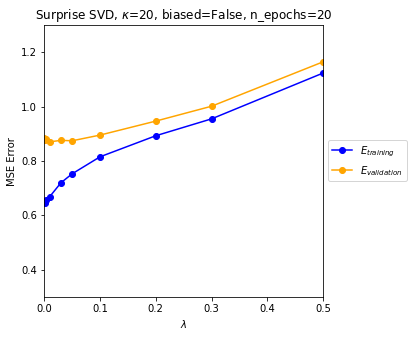

In [4]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0,0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3,0.5]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=20, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

TrnEr = np.array(train_err)**2
TstEr = np.array(test_err)**2
plt.figure(figsize=(5,5))
plt.plot(reg, TrnEr, 'o-', label="$E_{training}$",color='blue')
plt.plot(reg, TstEr, 'o-', label="$E_{validation}$",color='orange')
plt.title("Surprise SVD, $\kappa$=20, biased=False, n_epochs=20")
plt.xlabel("$\lambda$")
plt.ylabel("MSE Error")
plt.ylim([0.3,1.3])
plt.xlim([0,0.5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('SVDNoBias_RegErr20.png',bbox_inches='tight')
plt.show()

0
RMSE: 0.6715
RMSE: 0.9711
0.001
RMSE: 0.6742
RMSE: 0.9686
0.003
RMSE: 0.6757
RMSE: 0.9678
0.01
RMSE: 0.6827
RMSE: 0.9515
0.03
RMSE: 0.7183
RMSE: 0.9265
0.05
RMSE: 0.7622
RMSE: 0.9130
0.1
RMSE: 0.8516
RMSE: 0.9242
0.2
RMSE: 0.9254
RMSE: 0.9582
0.3
RMSE: 0.9701
RMSE: 0.9944
0.5
RMSE: 1.0532
RMSE: 1.0733


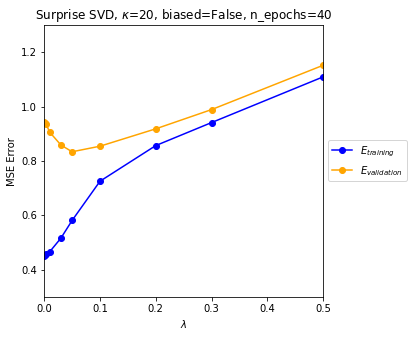

In [5]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0,0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3,0.5]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=40, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

TrnEr = np.array(train_err)**2
TstEr = np.array(test_err)**2
plt.figure(figsize=(5,5))
plt.plot(reg, TrnEr, 'o-', label="$E_{training}$",color='blue')
plt.plot(reg, TstEr, 'o-', label="$E_{validation}$",color='orange')
plt.title("Surprise SVD, $\kappa$=20, biased=False, n_epochs=40")
plt.xlabel("$\lambda$")
plt.ylabel("MSE Error")
plt.ylim([0.3,1.3])
plt.xlim([0,0.5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('SVDNoBias_RegErr40.png',bbox_inches='tight')
plt.show()

0
RMSE: 0.6127
RMSE: 1.0038
0.001
RMSE: 0.6153
RMSE: 1.0035
0.003
RMSE: 0.6207
RMSE: 0.9878
0.01
RMSE: 0.6254
RMSE: 0.9830
0.03
RMSE: 0.6516
RMSE: 0.9372
0.05
RMSE: 0.6944
RMSE: 0.9187
0.1
RMSE: 0.8060
RMSE: 0.9139
0.2
RMSE: 0.9148
RMSE: 0.9516
0.3
RMSE: 0.9680
RMSE: 0.9928
0.5
RMSE: 1.0515
RMSE: 1.0720


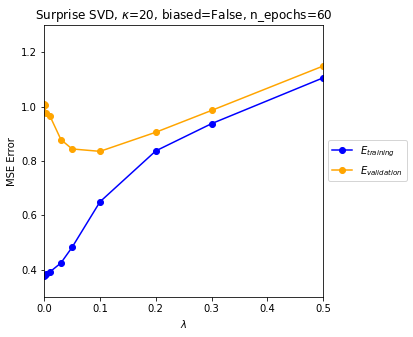

In [11]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0,0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3,0.5]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=60, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

TrnEr = np.array(train_err)**2
TstEr = np.array(test_err)**2
plt.figure(figsize=(5,5))
plt.plot(reg, TrnEr, 'o-', label="$E_{training}$",color='blue')
plt.plot(reg, TstEr, 'o-', label="$E_{validation}$",color='orange')
plt.title("Surprise SVD, $\kappa$=20, biased=False, n_epochs=60")
plt.xlabel("$\lambda$")
plt.ylabel("MSE Error")
plt.ylim([0.3,1.3])
plt.xlim([0,0.5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('SVDNoBias_RegErr60.png',bbox_inches='tight')
plt.show()

In [19]:
factors = [5, 10, 15, 20, 25, 50]
train_err = []
test_err = []

for f in factors:
    # Train on the training set
    clf = SVD(n_factors=f, biased=True, n_epochs=60, reg_all=0.1)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(f)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

5
RMSE: 0.8647
RMSE: 0.9167
10
RMSE: 0.8483
RMSE: 0.9149
15
RMSE: 0.8307
RMSE: 0.9107
20
RMSE: 0.8212
RMSE: 0.9095
25
RMSE: 0.8110
RMSE: 0.9088
50
RMSE: 0.7794
RMSE: 0.9052


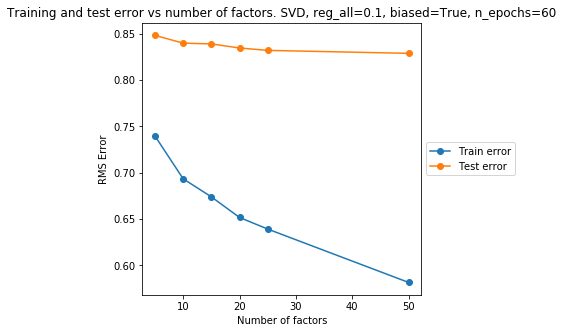

In [23]:
TrnEr = np.array(train_err)**2
TstEr = np.array(test_err)**2
plt.figure(1,figsize=(5,5))
plt.plot(factors, TrnEr, 'o-', label="Train error")
plt.plot(factors, TstEr, 'o-', label="Test error")
plt.title("Training and test error vs number of factors. SVD, reg_all=0.1, biased=True, n_epochs=60")
plt.xlabel("Number of factors")
plt.ylabel("RMS Error")
plt.legend()
plt.savefig('Surprise_EpB.png')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
factors = [5, 10, 15, 20, 25, 50]
train_err = []
test_err = []

for f in factors:
    # Train on the training set
    clf = SVD(n_factors=f, biased=False, n_epochs=60, reg_all=0.1)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(f)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

5
RMSE: 0.8600
RMSE: 0.9209
10
RMSE: 0.8327
RMSE: 0.9163
15
RMSE: 0.8209
RMSE: 0.9159
20
RMSE: 0.8073
RMSE: 0.9135
25
RMSE: 0.7995
RMSE: 0.9120
50
RMSE: 0.7627
RMSE: 0.9103


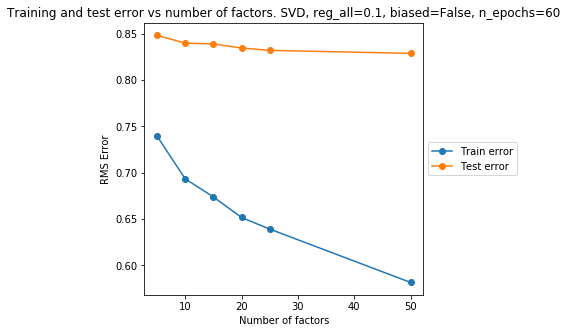

In [24]:
TrnEr = np.array(train_err)**2
TstEr = np.array(test_err)**2
plt.figure(1,figsize=(5,5))
plt.plot(factors, TrnEr, 'o-', label="Train error")
plt.plot(factors, TstEr, 'o-', label="Test error")
plt.title("Training and test error vs number of factors. SVD, reg_all=0.1, biased=False, n_epochs=60")
plt.xlabel("Number of factors")
plt.ylabel("RMS Error")
plt.legend()
plt.savefig('Surprise_EpNoB.png')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Training on Full Dataset, Getting Matrices

In [27]:
# Using the optimized parameters from cross-validation, we fit on the entire training set/
clf = SVD(n_factors=20, n_epochs=60, biased=False)#reg_all=0.1, 
clf.fit(full.build_full_trainset())

In [28]:
# Get the coefficient matrices and check their shapes
U = clf.pu # User coeffs
V = clf.qi # Movie coeffs
print(U.shape)
print(V.shape)

(943, 20)
(1682, 20)


# SVD and Projection

In [65]:
# Take transpose of V so that we get the same convention as notes: V now is K x N
Vt = V.T
print(Vt.shape)

(20, 1682)


In [66]:
# Do SVD (singular value decomposition) on the matrices
A, Sigma, B = np.linalg.svd(Vt, full_matrices=False) # Vt = A @ np.diag(Sigma) @ B 

print(A.shape)
print(np.diag(Sigma).shape)
print(B.shape)

(20, 20)
(20, 20)
(20, 1682)


In [31]:
print(Sigma)
print((Sigma[0]+Sigma[1])/sum(Sigma))

svd = sklearn.decomposition.TruncatedSVD(n_components=2)
svd.fit(V)
print(svd.explained_variance_ratio_)  
sum(svd.explained_variance_ratio_)

[64.52291543 17.23373627 13.01294999 12.06577035 11.46668784 11.2459552
 10.69845955 10.40053359 10.35329043 10.217909   10.02791576  9.93119638
  9.70908094  9.65469972  9.54312074  9.48796746  9.34263737  9.19503618
  8.98723068  8.88922769]
0.3073716404826455
[0.13083621 0.11650012]


0.2473363229560874

In [32]:
# Take the first 2 columns of A
A_red = A[:, :2]
print(A_red.shape)

# Multiply with Vt to reduce Vt from 20 dim to 2 dim
V_red = (A_red.T @ V.T)
print(V_red.shape)

# Make each row of V_red have unit variance
V_red /= np.tile(np.std(V_red, axis=1).reshape([2, 1]), (1, V_red.shape[1]))

(20, 2)
(2, 1682)


# Visualization

In [33]:
class Movie():
    """ Object used to hold a Movie and its properties. """
    def __init__(self, idx, name, genres):
        self.idx = idx
        self.name = name
        self.genres = genres
        self.ratings = []
        self.n_ratings = 0
        self.avg_score = 0
    def add_rating(self, rating):
        """ Update the average rating by taking average * n_ratings = total score. Then add the new rating,
        and then divide by (n_ratings + 1) to get the new average. """
        self.avg_score = (self.avg_score * self.n_ratings + rating) / (self.n_ratings + 1)
        self.n_ratings += 1
        self.ratings.append(rating)
    def __repr__(self):
        return "Movie - Id: {0.idx}, Name: {0.name}, n_ratings = {0.n_ratings}, Avg score = {0.avg_score}".format(self)
    
# Dictionary that associates each movie ID to its movie object
movies = {}
# Dictionary that associates each index to the genre name
genres = dict(zip(list(range(19)), ("Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", 
                                    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
                                    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western")))

# Read the list of movies and creates a dictionary of movie objects
with open("./data/movies.txt", "r", encoding="UTF8") as f:
    line = f.readline()
    
    # Split each line by the tab character. The 1st entry is the index, the 2nd entry is the name,
    # the 3rd entries onwards are the genres.
    while line != "":
        line = line.split("\t")
        # Convert the index to an int, convert the genres to a list of ints
        idx, name, genres_belong = int(line[0]), line[1], line[2:]
        movies[idx] = Movie(idx, name, [int(x) for x in genres_belong])
        
        line = f.readline()
        
# Read the ratings files and convert into a list of 3-tuples
def read_data(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    # Split each line by the tab character and convert to a tuple of ints
    return [tuple(map(int, line.split("\t"))) for line in data]
       
full_datalist = read_data("./data/data.txt")

# Extract only the ratings from the full dataset
full_ratings = [datapt[2] for datapt in full_datalist]

# Go through the entire rating databast and add all the ratings for each movie
for rating_tuple in full_datalist:
    user_idx, movie_idx, rating = rating_tuple
    movies[movie_idx].add_rating(rating)
    
# Get the top 10 most popular movies by sorting the list of movies by n_ratings
most_pop10 = sorted(list(movies.values()), key=lambda x: x.n_ratings, reverse=True)[:10]
# Movie IDs of these movies
most_pop10_idx = [movie.idx for movie in most_pop10]

# Get the top 10 best movies by sorting the list of movies by avg_score
best10 = sorted(list(movies.values()), key=lambda x: x.avg_score, reverse=True)[:10]
# Movie IDs of these movies
best10_idx = [movie.idx for movie in best10]

# Print how many movies fall in each genre 
for i in range(19):
    print(i, genres[i], len([movie.idx for movie in list(movies.values()) if movie.genres[i]]))
    
# We decide to use 5, 8 ,16 since they have the most data
# Collect the indices of movies that have these genres into lists
genre5_idx = [movie.idx for movie in list(movies.values()) if movie.genres[5]]
genre8_idx = [movie.idx for movie in list(movies.values()) if movie.genres[8]]
genre16_idx = [movie.idx for movie in list(movies.values()) if movie.genres[16]]

star_idx = [50, 222, 227, 228, 229, 230, 449, 450, 172, 181]

0 Unknown 2
1 Action 251
2 Adventure 135
3 Animation 42
4 Childrens 122
5 Comedy 505
6 Crime 109
7 Documentary 50
8 Drama 725
9 Fantasy 22
10 Film-Noir 24
11 Horror 92
12 Musical 56
13 Mystery 61
14 Romance 247
15 Sci-Fi 101
16 Thriller 251
17 War 71
18 Western 27


(2, 798)
(2, 1682)


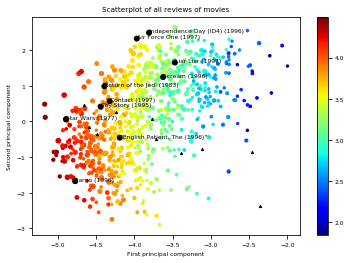

In [53]:
import matplotlib
matplotlib.rcParams.update({'font.size': 6})

ratings30 = [movie for movie in list(movies.values()) if movie.n_ratings > 30]
ratings30_idx =  [movie.idx for movie in ratings30]

scores30 = np.array([movies[i].avg_score for i in ratings30_idx])
ratings30 = np.array([movies[i].n_ratings for i in ratings30_idx])

V_red_30 = np.array([V_red[:, clf.trainset.to_inner_iid(str(i))] for i in ratings30_idx]).T
print(V_red_30.shape)

plt.scatter(V_red_30[0, :], V_red_30[1, :], c=scores30, cmap='jet', alpha=1, s=np.sqrt(ratings30))
plt.colorbar()

plt.title("Scatterplot of all reviews of movies")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# plt.savefig("./Visualizations/Scores30Raw.png", dpi=300)

for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='k', s=np.sqrt(np.array([movies[i].n_ratings for i in most_pop10_idx])))
for i in best10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='k', marker='^', s=5)
    
plt.savefig("./Visualizations/Scores30.png", dpi=300)

for i in most_pop10_idx:
    plt.annotate(movies[i].name, (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
plt.savefig("./Visualizations/Scores30Labelled.png", dpi=300)

(2, 798)


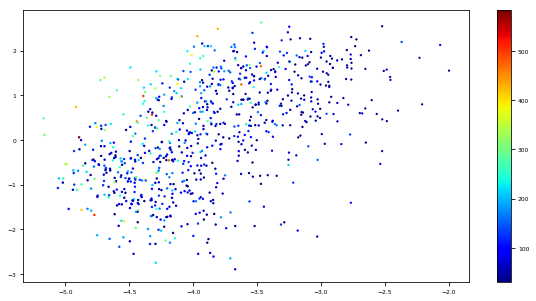

In [57]:
print(V_red_30.shape)
plt.figure(figsize=(10,5))
plt.scatter(V_red_30[0, :], V_red_30[1, :], c=ratings30, cmap='jet', alpha=1, s=np.sqrt(scores30))
plt.colorbar()
plt.show()

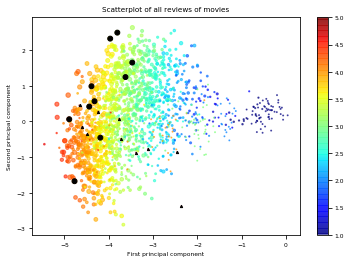

In [62]:
skips = 1
scores = np.array([movies[int(clf.trainset.to_raw_iid(i))].avg_score for i in range(V_red.shape[1])])
nratings = np.array([movies[int(clf.trainset.to_raw_iid(i))].n_ratings for i in range(0, V_red.shape[1], skips)])

plt.scatter(V_red[0, :], V_red[1, :], c=scores, cmap='jet', alpha=0.6, s=np.sqrt(nratings))
plt.colorbar()

        
plt.title("Scatterplot of all reviews of movies")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.savefig("./Visualizations/ScoresRaw.pdf")
plt.savefig("./Visualizations/ScoresRaw.png", dpi=300)

for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='k', s=np.sqrt(np.array([movies[i].n_ratings for i in most_pop10_idx])))
for i in best10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='k', marker='^', s=5)

plt.savefig("./Visualizations/Scores.pdf")
plt.savefig("./Visualizations/Scores.png", dpi=300)

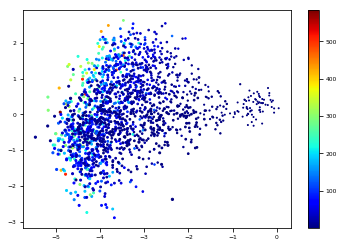

In [64]:
plt.scatter(V_red[0,:], V_red[1,:], c=nratings, cmap='jet', alpha=1, s=scores)
plt.colorbar()

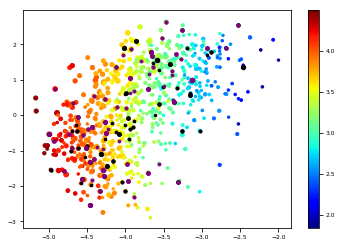

In [40]:
# Scatter the 2 dimensions of the reduced V
plt.scatter(V_red_30[0, :], V_red_30[1, :], c=scores30, cmap='jet', alpha=1, s=np.sqrt(ratings30))
plt.colorbar()

# Plot by genre
for i in [movie.idx for movie in list(movies.values()) if movie.genres[2]]:
    try:
        plt.scatter(V_red_30[0, clf.trainset.to_inner_iid(str(i))], V_red_30[1, clf.trainset.to_inner_iid(str(i))], c='k', s=np.sqrt(ratings30[i]))
    except IndexError:
        pass
    
for i in [movie.idx for movie in list(movies.values()) if movie.genres[15]]:
    try:
        plt.scatter(V_red_30[0, clf.trainset.to_inner_iid(str(i))], V_red_30[1, clf.trainset.to_inner_iid(str(i))], c='purple', s=np.sqrt(ratings30[i]))
    except IndexError:
        pass

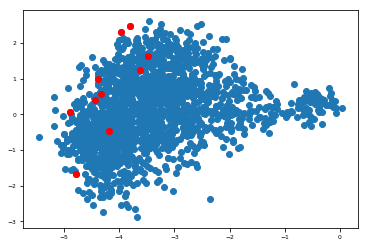

In [41]:
# Scatter the 2 dimensions of the reduced V
plt.scatter(V_red[0, :], V_red[1, :])
# plt.ylim([-0.03,0.03])
# plt.xlim([-0.03,0.03])

# Top 10 most popular movies
for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')

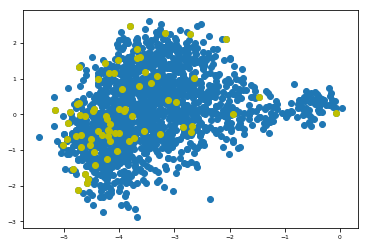

In [42]:
# Scatter the 2 dimensions of the reduced V
plt.scatter(V_red[0, :], V_red[1, :])

# Plot by genre
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[1]]:
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[2]]:
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='g')
for i in [movie.idx for movie in list(movies.values()) if movie.genres[17]]:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='y')

Star Wars (1977) 4.3584905660377355 583
Contact (1997) 3.8035363457760316 509
Fargo (1996) 4.15551181102362 508
Return of the Jedi (1983) 4.0078895463510875 507
Liar Liar (1997) 3.156701030927836 485
"English Patient, The (1996)" 3.656964656964657 481
Scream (1996) 3.4414225941422596 478
Toy Story (1995) 3.8783185840707963 452
Air Force One (1997) 3.6310904872389793 431
Independence Day (ID4) (1996) 3.438228438228438 429


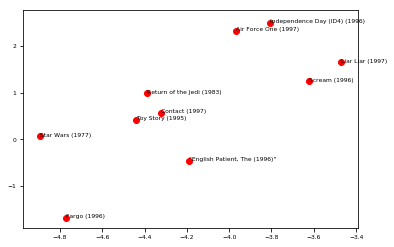

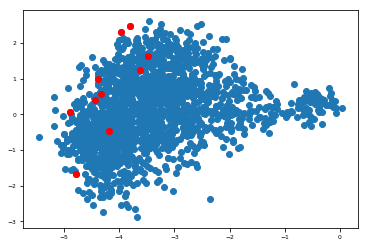

In [43]:
# 10 most popular movies
for i in most_pop10_idx:
    print(movies[i].name, movies[i].avg_score, movies[i].n_ratings)
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c="r")
    plt.annotate(movies[i].name, (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
    
# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :])
# Overlay 10 most popular movies
for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')

"Great Day in Harlem, A (1994)" 5.0 1
They Made Me a Criminal (1939) 5.0 1
Prefontaine (1997) 5.0 3
Marlene Dietrich: Shadow and Light (1996)  5.0 1
Star Kid (1997) 5.0 3
"Saint of Fort Washington, The (1993)" 5.0 2
Santa with Muscles (1996) 5.0 2
Aiqing wansui (1994) 5.0 1
Someone Else's America (1995) 5.0 1
Entertaining Angels: The Dorothy Day Story (1996) 5.0 1


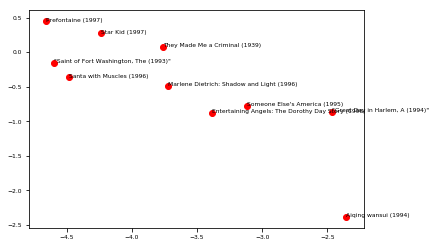

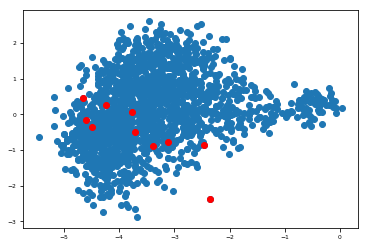

In [44]:
# 10 best movies
for i in best10_idx:
    print(movies[i].name, movies[i].avg_score, movies[i].n_ratings)
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c="r")
    plt.annotate(movies[i].name[:], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
    
# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :])
# Overlay 10 best movies
for i in best10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')

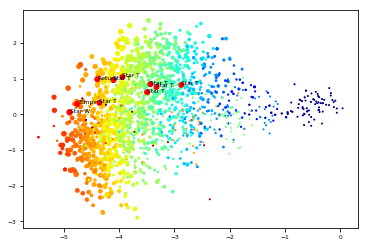

In [45]:
# 10 arbitrary movies
# for i in star_idx:
#     print(movies[i].name, movies[i].avg_score, movies[i].n_ratings)
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c="r")
#     plt.annotate(movies[i].name[:], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))

# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :], c=scores, s=np.sqrt(nratings), cmap='jet')
# Overlay 10 arbitrary movies
for i in star_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r', s=np.sqrt(np.array([movies[i].n_ratings for i in star_idx])))
    plt.annotate(movies[i].name[:6], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
plt.savefig("./Visualizations/Star.png", dpi=300)    

In [46]:
np.save("V", V)
np.save("V_red", V_red)

In [47]:
action_movies = [movie for movie in movies.values() if movie.genres[1]]
action_movies.sort(key=lambda x: x.n_ratings, reverse=True)
action_movies_idx = [movie.idx for movie in action_movies[10:20]]

adv_movies = [movie for movie in movies.values() if movie.genres[2]]
adv_movies.sort(key=lambda x: x.n_ratings, reverse=True)
adv_movies_idx = [movie.idx for movie in adv_movies[10:20]]

war_movies = [movie for movie in movies.values() if movie.genres[17]]
war_movies.sort(key=lambda x: x.n_ratings, reverse=True)
war_movies_idx = [movie.idx for movie in war_movies[10:20]]

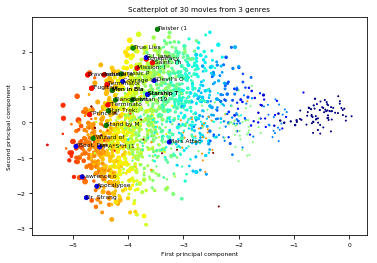

In [48]:
# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :], c=scores, s=np.sqrt(nratings), cmap='jet')
# Overlay 10 arbitrary movies
for i in action_movies_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r', s=np.sqrt(np.array([movies[i].n_ratings for i in action_movies_idx])))
    plt.annotate(movies[i].name[:10], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))

for i in adv_movies_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='g', s=np.sqrt(np.array([movies[i].n_ratings for i in adv_movies_idx])))
    plt.annotate(movies[i].name[:10], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))

for i in war_movies_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='b', s=np.sqrt(np.array([movies[i].n_ratings for i in war_movies_idx])))
    plt.annotate(movies[i].name[:10], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
    
plt.title("Scatterplot of 30 movies from 3 genres")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("./Visualizations/3Genres.png", dpi=300)    